<a href="https://colab.research.google.com/github/manveethjain8/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"seeds_dataset.txt", sep='\s+', header=None)
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2558876592.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(r"seeds_dataset.txt", sep='\s+', header=None)


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
columns_list = [
    'Area',                     # 1. area A
    'Perimeter',                # 2. perimeter P
    'Compactness',              # 3. compactness C = 4*pi*A/P^2
    'Kernel_Length',            # 4. length of kernel
    'Kernel_Width',             # 5. width of kernel
    'Asymmetry_Coefficient',    # 6. asymmetry coefficient
    'Kernel_Groove_Length',     # 7. length of kernel groove
    'Group'
]


df.columns = columns_list
df


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coefficient,Kernel_Groove_Length,Group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
X = df.drop(columns=['Group'])

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features)
])

X_processed = preprocessor.fit_transform(X)
X_processed.shape

(210, 7)

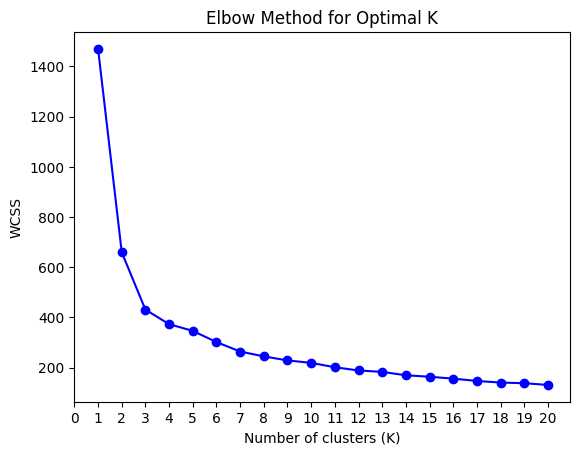

In [ ]:
wcss = []
k_range = range(1, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    n_init=10
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(21), labels=range(21))
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_processed)
labels = kmeans.labels_


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plot_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Clusters': labels.astype(str)
})

centroids_df = pd.DataFrame(centroids_pca, columns=['PCA1', 'PCA2'])


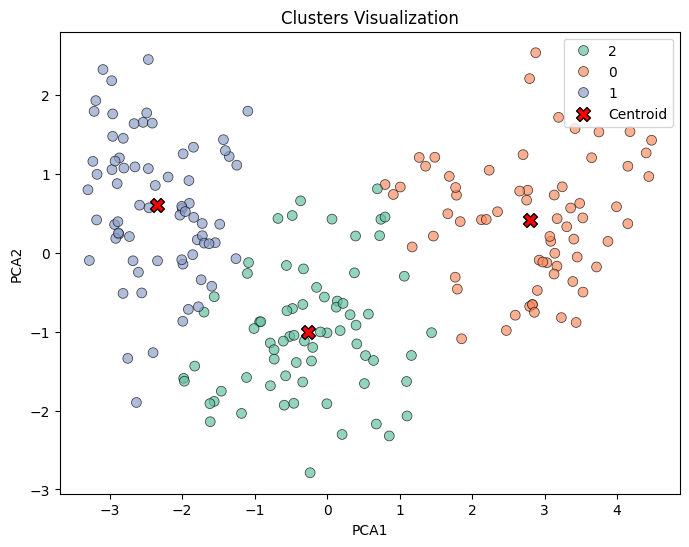

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=plot_df,
    x='PCA1',
    y='PCA2',
    hue='Clusters',
    palette='Set2',
    s=50,
    alpha=0.7,
    edgecolors='k'
)

plt.scatter(
    centroids_df['PCA1'],
    centroids_df['PCA2'],
    c='red',
    s=100,
    marker='X',
    edgecolor='black',
    label='Centroid'
)

plt.title("Clusters Visualization")
plt.legend()
plt.show()

In [5]:

df = pd.read_csv(r"Iris.csv", header=0)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
X = df.drop(columns=['Species'])

In [7]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features)
])

X_processed = preprocessor.fit_transform(X)
X_processed.shape

(150, 5)

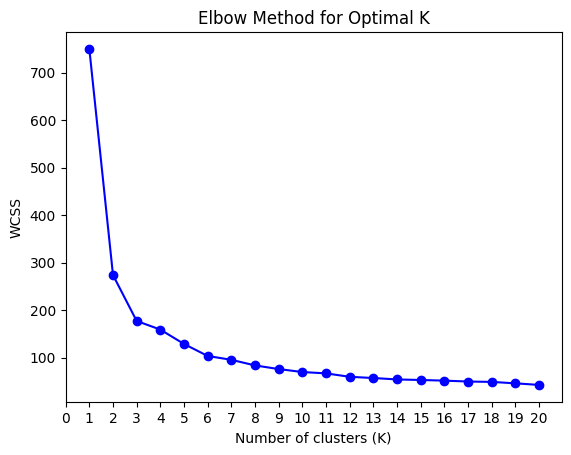

In [8]:
wcss = []
k_range = range(1, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    n_init=10
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(21), labels=range(21))
plt.title('Elbow Method for Optimal K')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, n_init=100, random_state=0)
kmeans.fit(X_processed)
labels = kmeans.labels_


In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plot_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Clusters': labels.astype(str)
})

centroids_df = pd.DataFrame(centroids_pca, columns=['PCA1', 'PCA2'])


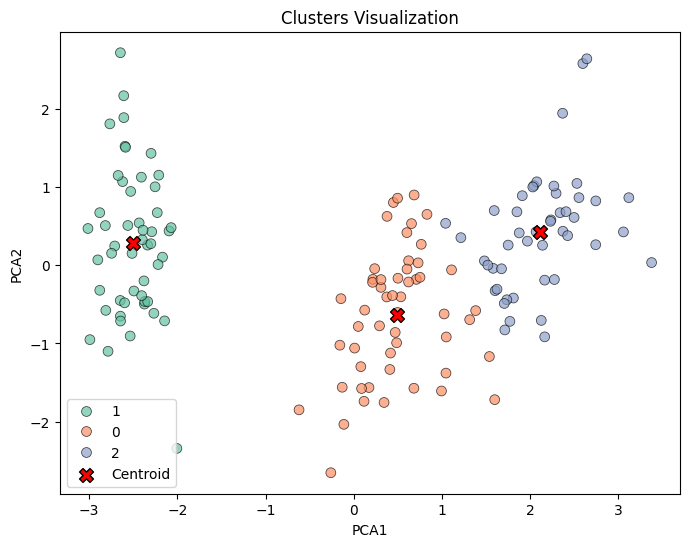

In [14]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=plot_df,
    x='PCA1',
    y='PCA2',
    hue='Clusters',
    palette='Set2',
    s=50,
    alpha=0.7,
    edgecolors='k'
)

plt.scatter(
    centroids_df['PCA1'],
    centroids_df['PCA2'],
    c='red',
    s=100,
    marker='X',
    edgecolor='black',
    label='Centroid'
)

plt.title("Clusters Visualization")
plt.legend()
plt.show()